In [1]:
### BEGIN hide_toggle
### Update 30/10-'20
def hide_toggle_code(off=0):
    """This function generates HTML code to toggle the display of an input
    cell.
    
    The output of the cell will still be displayed.  This can be used
    to hide (from immediate view) some code to generate data or the
    like.  It can also be used to hide other notebook explicit
    implementations - e.g., C++ processing, or the like.
    
    Note, calling this function alone will not enable toggling.
    Instead, we must wrap the generated code in an
    `IPython.display.HTML` object and return that as the cell value.
    This will let IPython evaluate the HTML code and pass it on to the
    browser.
    
    If all one wants is to toggle a cell one can use the function
    `hide_toggle` below.  However, we can also combine the code
    generated here with other HTML code - for example _style_
    declarations and pass that along embedded in an HTML object.
    
    Parameters
    ----------
    off : int 
        Offset of cell to hide relative to the cell calling this function 
    
    Returns
    -------
    code : str 
        HTML code to enable toggling of the cell

    """
    from random import randint 
    from IPython.display import HTML 
    
    jp_cell     = 'document.getElementsByClassName("jp-Cell jp-mod-selected")[0]'
    jq_cell     = '$("div.cell.code_cell.rendered.selected")'
    toggle_text = 'Please close'
    cell_id     = str(randint(1,2**64))
    func_name   = f'code_toggle_{cell_id}'
    
    scr1 = f'''
    <script id="s{cell_id}">
      function {func_name}() {{
          if (typeof $ == "undefined") {{
              // console.log("For JupyterLab (no jQuery)")
              var c  = {jp_cell};
              // console.log(c);
              var iw = c.getElementsByClassName("jp-Cell-inputArea")[0];
              var op = c.getElementsByClassName("jp-OutputPrompt")[0];
              // console.log(iw,op)
              if (iw.style.display !== undefined && iw.style.display === "none") {{
                  iw.style.display = null;
                  op.style.display = null;
              }} else {{
                  iw.style.display = "none";
                  op.style.display = "none";
              }}
           }}
           else {{
                console.log('Will toggle input display {jp_cell}')
                console.log({jp_cell})
                {jq_cell}.find("div.input").toggle();
                {jq_cell}.find("div.out_prompt_overlay.prompt").toggle();
                {jq_cell}.find("div.out_prompt_overlay.prompt").toggle();
                {jq_cell}.find("div.prompt.output_prompt").toggle();
                console.log('End toggle input display {jp_cell}')
           }}
      }}  
    </script>
    '''
    but = f'''
     <details style='z-index:99;position:relative;color:lightgray;' 
             onclick='javascript:{func_name}()'>
        <summary>&gt;</summary>
    </details>
    '''
    scr2 = f'''
    <script>
      var c = null;
      if (typeof $ == "undefined") {{
         var c  = document.getElementById("s{cell_id}");
         var p  = c.parentNode.parentNode.parentNode.parentNode.parentNode;
         var iw = p.getElementsByClassName("jp-Cell-inputArea")[0];
         var op = p.getElementsByClassName("jp-OutputPrompt")[0];
         var ou = c.parentNode;
         iw.style.display = "none";
         op.style.display = "none";
         ou.style.background = "transparent";
      }}
      else {{
          var p = $('#s{cell_id}').parents();
          p.siblings('div.input').hide();
          p.find('div.prompt.output_prompt').hide()
          p.find('div.out_prompt_overlay.prompt').hide()      
      }}
      // {func_name}
    </script>
    '''
    return scr1+but+scr2        

def hide_toggle(off=0,cnt=None):
    """This will wrap the HTML code returned from the above function
    in an `IPython.display.HTML` object so that the notebook will 
    evaluate the HTML code. 
    
    This function is what we will use most of the time.  However, 
    the function `hide_toggle_code` can be combined with other code 
    and then be put  into an HTML object to let the notebook evaluate
    all the code. 

    Parameters 
    ----------
    off : int 
        Cell offset relative to calling cell which we should toggle 
    cnt : int or None 
        If not None, set the execution count to this number 
        (currently broken)
        
    Returns
    -------
    object : IPython.display.HTML 
        HTML object wrapping code to toggle cell 
    """
    from IPython.display import HTML
    if cnt is not None:
        get_ipython().execution_count = cnt
    return HTML(hide_toggle_code(off))
### END hide_toggle

### BEGIN show_all
def _show_all():
    try:
        from IPython.core.interactiveshell import InteractiveShell
        InteractiveShell.ast_node_interactivity = "all"
    except:
        pass 
### END show_all
    
### BEGIN setup_matplotlib
### Update 30/10-'20
def _setup_matplotlib():
    """Set-up Matplotlib parameters. 
    
    We specify that we want both PDF and PNG images, and 
    that the default image size should be 8 by 8 inches 
    
    We also disable warnings about too many open figures 
    """
    %matplotlib inline 
    from matplotlib import rcParams 
    
    rcParams['figure.max_open_warning'] = 0
    rcParams['font.serif'] = ['Palatino'] + rcParams['font.serif']
    rcParams['font.family'] = ['serif']
    rcParams['mathtext.fontset'] = 'dejavuserif'
    rcParams['axes.formatter.use_mathtext'] = True

    f = None
    try:
        # IPython >= 7.23 depcrates set_matplotlib_formats
        from matplotlib_inline.backend_inline import set_matplotlib_formats
        f = set_matplotlib_formats
        
    except Exception as e:
        try:
            from IPython.display import set_matplotlib_formats
            f = set_matplotlib_formats
        except Exception as e:
            pass 

    if f is not None:
        set_matplotlib_formats('png','pdf')
        
_setup_matplotlib()
### END setup_matplotlib
_setup_matplotlib()

### BEGIN css_styling
### Update 30/10-'20
def css_styling_code():
    """This function returns HTML code to customize the CSS 
    of the notebook 
    
    - The text font to be Palatino (serif)
    - Headers are oblique (italic)
    - Extra spacing below H1 headers 
    - Extra spacing spacing above H1 headers 
    - Headers have larger fonts, and is set in normal weight
    - Remove padding around code cells 
    - Code uses the fint "Source Code Pro" (or monospace)
    - Code background is changed to light yellow 
    - Output background is set to lavender
    
    The function combines these CSS declarations with the HTML 
    code from `hide_toggle_code` above so what we automatically 
    hide this code from the user. 
    """
    styles = '''
    <style>
    .rendered_html, .jp-RenderedHTMLCommon {
        font-family: Palatino, serif
    }
    h1, h2, h3, h4, .jp-RenderedHTMLCommon h1, .jp-RenderedHTMLCommon h2, .jp-RenderedHTMLCommon h3, .jp-RenderedHTMLCommon h4{
        font-style: oblique;  
    }
    jp-RenderedHTMLCommon h1:first-child {
        margin-top: 4ex;
    }
    .jp-RenderedHTMLCommon h1, .rendered_html h1 {
        margin-bottom: 2ex;
        font-weight: normal;
        font-size: 220%;
    }
    .jp-RenderedHTMLCommon h2, .rendered_html h2 {
        font-weight: normal;
        font-size: 180%;
    }
    .jp-RenderedHTMLCommon h3, .rendered_html h3 {
        font-weight: normal
    }
    .jp-RenderedHTMLCommon h4, .rendered_html h4 {
        font-weight: normal
    }
    p code {
        padding: 0;
    }
    .CodeMirror, .jp-Notebook .CodeMirror.cm-s-jupyter, code, div.input_area {
        font-family: "Source Code Pro", source-code-pro,Consolas, monospace;
        background: lightyellow;
    }
    .output_text, .output_stream, .output_stdout, .jp-OutputArea-executeResult .jp-OutputArea-output {
        background: lavender;
    }
    .output_error {
        background-color: #fff2f2;
    }
    .celltag_alert-info li {
        list-style-image:  url(data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAABAAAAAQCAYAAAAf8/9hAAAAAXNSR0IArs4c6QAAAAZiS0dEAP8A/wD/oL2nkwAAAAlwSFlzAAALEwAACxMBAJqcGAAAAAd0SU1FB9gEGxE4IQYzJ14AAAI3SURBVDjLZZNPSFVBFIe/e9+zd3silBCl0SZoU4s2rVq0EB5tQip4UNvATVGu3QRBiyAi2iltWkgbF5EgRhFFRpiWtrWIzDIV1Pzz7p15M2fmtvDevOqBw8DM9zvnN8ycgF3R/eDtM2mac96ZdrFNxBikqbRV+vHH/ut9gAZczoe7C3gnF0f6au1OLM5avFi8d1Ea+JvAMSAq8nsKOGs5f2cYJ3Y7rc2PO4BqkS8DdD98f9tbe1ysCoxOBo1qlEXHJWcM4b5KPU19zleA0o4Clx99eO3EdqVewHsCoFRugUoVghJO7A6H6Vx9wdtYi27cr5x6dy/03nVtWTU7bWeZh6jNUcAiCaFTURl9A+gs56AviHzh3mnqtdPxm6knfQPLU7UaokASQq/agY7yDrG16Mba6Pz48NP56VdrgAApYObGaicPtkovToFLQBKA/WUxTe3FRk4san15aGKgd3Dj560rrdGJS6FT0X9YYvLuiMKL1kAQOpHZ3PqfyZfP41+9PW1VfzX0RXFSECfgNEmSTgImdDruF2O0E8vvqZG1auQubAsKooIYYHpGvwA2g+xndQBHgWa6cG0ih5cW/w6VvEq3nChwCoBvs+bL2Z7VceBHGTDAIrABpMVuhw+4OiLgLIglOLPYBTQAlfErIeCzjRVg1dtEb1kt5Omv+DTV2YssAN+zNdkzC42N9brV8WdvYp07seOdM2Of1F3AAknW0AJpwN6IgEPAEaANaMlcbmZdl7KRBuAfAb+v//yMAJoAAAAASUVORK5CYII=);
    }
    </style>
    <script>
    if (typeof $ !== "undefined") {
  $(function(){
 $(".celltag_alert         .text_cell_render").addClass("alert");
 $(".celltag_alert-info    .text_cell_render").addClass("alert alert-info");
 $(".celltag_alert-warning .text_cell_render").addClass("alert alert-warning");
 $(".celltag_alert-danger  .text_cell_render").addClass("alert alert-danger");
 $(".celltag_alert-success .text_cell_render").addClass("alert alert-successs");
      });
    }
    </script>
    '''
    return styles

def css_styling():
    from IPython.display import HTML 
    
    return HTML(hide_toggle_code()+css_styling_code())
### END css_styling
css_styling()

### Christian Holm Christensen <a class='tocSkip'></a>

# Orbits in General Relativity<a class='tocSkip'></a>
## Schwarzchild geometry <a class='tocSkip'></a>
## 0.1 - October 2020 <a class='tocSkip'></a>

> In this note, we will derive the formula for the gravitational force of a spherically symmetric mass $M$ on a particle of mass $m$ using the Schwarzwald solution in general relativity.  Here, we will only be concerned with the symbolic calculations (using [_SymPy_](https://sympy.org), and leave the numerical calculations to the interested reader. 
>
> This document is available in many formats at https://cholmcc.gitlab.io/nbi-python

### Niels Bohr Institutet <a class='tocSkip'></a>

### Christian Holm Christensen <a class='tocSkip'></a>

# Orbitaler i generel relativitetsteori<a class='tocSkip'></a>
## Schwarzchild geometri <a class='tocSkip'></a>
## 0.1 - Oktober 2020 <a class='tocSkip'></a>

> I denne note udleder vi formlen for tyngdekraften fra en sfærisk symmetrisk masse $M$ på en partikel amed massen $m$ ved hjælp af Schwarzwald-løsningen i generel relativitetsteori. Her vil vi kun beskæftige os med de symbolske beregninger (ved hjælp af [_SymPy_](https://sympy.org) og overlade de numeriske beregninger til den interesserede læser.
>
> Dette dokument er tilgængeligt i mange formater på https://cholmcc.gitlab.io/nbi-python

### Niels Bohr Institutet <a class='tocSkip'></a>

# Introduktion

I denne note vil vi undersøge en partikels bane omkring en masse.  Vi vil bruge Schwarzchilds løsning i generel relativitetsteori.  

Kraften på en masse $m$ med relativ position $\vec{r}$ fra en sfærisk symmetrisk masse $M$ er i dette tilfælde givet ved 

# Introduction

In this note, we will examine the orbit of a particle around a mass. We will use Schwarzchild's solution for the general theory of relativity.

The force on a mass of $m$ with relative position $\vec{r}$ from a spherically symmetrical mass of $M$ is in this case given by

$$\vec{F} = -\frac{GMm}{r^3}\vec{r}\left(1 + \frac{3l^2}{c^2r^2}\right)\quad,$$ 

hvor 

- $G\approx 6.67430\times10^{-11}\,\mathrm{m}^3/(\mathrm{kg}\,\mathrm{s})$ er Newtons tyngdekonstant, 
- $c=299\,792\,458\,\mathrm{m}/\mathrm{s}$ er lysets hastighed, 
- $\vec{r}$ er retningsvektoren fra center af massen $M$ til center af massen $m$, 
- $r=\|\vec{r}\|$ er længden af $\vec{r}$, 
- $l=\|\vec{v}\times\vec{r}\|$ er det angulærer moment per masse enhed, og 
- $\vec{v}$ er massens hastighedsvektor

where

- $G\approx 6.67430\times10^{-11}\,\mathrm{m}^3/(\mathrm{kg}\,\mathrm{s})$ is Newton's gravitational constant,
- $c=299\,792\,458\,\mathrm{m}/\mathrm{s}$ is the speed of light,
- $\vec{r}$ is the direction vector from the center of the mass $M$ to the center of the mass $m$,
- $r=\|\vec{r}\|$ is the length of $\vec{r}$,
- $l=\|\vec{v}\times\vec{r}\|$ is the angular momentum per unit mass, and
- $\vec{v}$ is the velocity vector of the mass $m$.

Det sidste led i parentesen ovenover $3l^2/(c^2r^2)$ er en general relativistisk korrektion som i den klassiske grænse $c\rightarrow\infty$ forsvinder og vi genfinder den klassiske tyngdekraft 

The last term in the parentheses above $3l^2/(c^2r^2)$ is a general relativistic correction which in the classical limit $c\rightarrow\infty$ disappears and we recover the classical gravity

$$\vec{F}^{\,CL} = \frac{GMm}{r^3}\vec{r}\quad.$$

## Naturlige enheder

Vi vil vælge at arbejde i _naturlige enheder_.  Det vil sige 

## Natural Units

We will choose to work in _natural units_. That means

$$G=c=\hbar=k_B=1\quad.$$

($G$ og $c$ defineret ovenover. De to andre, $\hbar=h/(2\pi)$ og $k_B$, er henholdvis Planks - divideret med $2\pi$ - og Boltzmanns konstanter). 

($G$ and $c$ defined above. The other two, $\hbar=h/(2\pi)$ and $k_B$, are Plank's - divided by $2\pi$ - and Boltzmann's constants, respectively).

# Indledende øvelse  - Minkowsky (flad) rum-tid

Lad os starte med at kigge på en flad rum-tid (også kaldet Minkowski-rum).  Vi definere vores metrik $\eta^{\mu\nu}$

# Preliminary exercise - Minkowsky (flat) space-time

Let’s start by looking at a flat space-time (also called Minkowski space). We define our metric $\eta^{\mu\nu}$

In [2]:
from sympy.tensor.tensor import TensorIndexType, tensor_indices, tensor_heads
from sympy import diag, Eq, UnevaluatedExpr, symbols, Matrix, Derivative

Minkowski  = TensorIndexType('Minowski',metric_name='eta',dummy_name='i')
repl       = {Minkowski:diag(-1,1,1,1)}
mu,nu      = tensor_indices('mu nu',Minkowski)

Eq(Minkowski.metric(mu,nu),repl[Minkowski],evaluate=False)

Eq(eta(mu, nu), Matrix([
[-1, 0, 0, 0],
[ 0, 1, 0, 0],
[ 0, 0, 1, 0],
[ 0, 0, 0, 1]]))

> **Bemærkning til koden**
>
> - `TensorIndexType` fortæller hvilken type indeks vi vil bruge i vores metrik.  Vi har ikke angivet hvad selve metrikken er. 
> - `repl` er en `dict` af _replacements_.  Her siger vi at tensoren (metrikken) `Minkowski` skal være en diagonal matrix med `-1` øverst til venstre, og `1` på resten af diagonalen. 
> - `mu,nu` er to indeks variable vi vil bruge, knyttet til metrikken `Minkowski`. 
>
> Bemærk at `Minkowski` kender intet til selve metrikken. 

> **Note to the code**
>
> - `TensorIndexType` tells what type of index we want to use in our metrics. We have not specified what the metric itself is.
> - `repl` is a` dict` of _replacements_. Here we say that the tensor (metric) `Minkowski` should be a diagonal matrix with` -1` at the top left, and `1` at the rest of the diagonal.
> - `mu, nu` are two index variables we want to use, linked to the metric` Minkowski`.
>
> Note that `Minkowski` knows nothing about the metric itself.

Dernæst ser vi på sted fire-vektoren $v^{\alpha}$

Next, we look at position four-vector $v^{\alpha}$

In [3]:
v          = tensor_heads('v',[Minkowski])
t, x, y, z = symbols('t x y z',positive=True)

repl.update({v(mu):[t,x,y,z]})

Eq(v(mu),Matrix(repl[v(mu)]),evaluate=False)

Eq(v(mu), Matrix([
[t],
[x],
[y],
[z]]))

> **Bemærkning til koden**
>
> - `tensor_head` definere en specifik tensor (i dette tilfælde en vektor). 
> - Vi skriver ind i vores _replacement_ `dict` at $v^{\mu}$ skal forstås som vektoren $(t,x,y,z)$. 
> - Vi bruger `Matrix` til at få skrevet en vektor ud. 

> **Note to the code**
>
> - `tensor_head` define a specific tensor (in this case a vector).
> - We write in our _replacement_ `dict` that $v^{\mu}$ should be understood as the vector $(t,x,y,z)$.
> - We use `Matrix` to print the vector.

Productet $v^{\mu}v_{\mu}$ - med Einstein summation over indeks - giver 

The product $v^{\mu}v_{\mu}$ - with Einstein summation over indexes - gives

In [4]:
Eq(v(mu)*v(-mu),(v(mu)*v(-mu)).replace_with_arrays(repl,[]))

Eq(v(i_0)*v(-i_0), -t**2 + x**2 + y**2 + z**2)

> **Bemærkning til koden**
>
> - Med Einstein summation over indeks mener vi at 
>
>   $$v^{\mu}u_{\mu} = \eta_{\mu\nu}v^{\mu}u^{\nu} = (\eta v)\cdot u = \sum_i u_i\sum_j \eta_{ij}v_j$$
>
> - I _SymPy_ skriver den _kontravariante_ vektor $v^{\mu}$ som `v(mu)` og den _kovariante_ vektor $v_{\mu}$ ved at skifte fortegn på indekset `v(-mu)`. 
> - Metoden `.replace_with_arrays` evaluerer udtrykket med _specifikke_ værdier for tensor elementerne.  Her bruger vi vores _replacement_ `dict`

> **Note to the code**
>
> - By Einstein summation over indexes we mean
>
> $$v^{\mu}u_{\mu} = \eta_{\mu\nu}v^{\mu}u^{\nu} = (\eta v)\cdot u = \sum_i u_i\sum_j \eta_{ij}v_j$$
>
> - In _SymPy_ write the _contravariant_ vector $v^{\mu}$ as `v(mu)` and the _covariant_ vector $v_{\mu}$ by changing the sign of the index `v(-mu )`.
> - The method `.replace _with_ arrays` evaluates the expression with _specific_ values for the tensor elements. Here we use our _replacement_ `dict`

Hvis $\tau=t'$ er partiklens egentid (engl. _proper time_), og partiklen bevæger sig langs $x$ aksen med hastigheden $\beta$ (i enheder af lyshastigheden $c$), så har vi Lorentz transformationen 

$$t'=\gamma (t-\beta x)\quad x'=\gamma(x-\beta t)\quad y'=y\quad z'=z\quad,$$ 

hvor $\gamma = 1/\sqrt{1-\beta^2}$  Vi finder at 

If $\tau=t'$ is the particle's proper time, and the particle moves along the $x$ axis at the speed $\beta$ (in units of the speed of light $c$), then we have the Lorentz transformation

$$t'=\gamma (t-\beta x)\quad x'=\gamma(x-\beta t)\quad y'=y\quad z'=z\quad,$$

where $\gamma = 1/\sqrt{1-\beta^2}$. We find

In [5]:
beta, gamma = symbols('beta gamma',positive=True)
tau         = gamma*(t - beta*x)

Eq(Derivative(symbols('tau'),t,evaluate=False),tau.diff(t))

Eq(Derivative(tau, t), gamma)

Hvis vi erstatter $(x,y,z)\rightarrow (u_x,u_y,u_z)t$, så finder vi  

If we replace $(x,y,z)\rightarrow (u_x,u_y,u_z)t$, then we find

In [6]:
ux,uy,uz = symbols('u_x u_y u_z',real=True)
u        = tensor_heads('u',[Minkowski])

repl.update({u(mu):[gamma*e.subs({x:ux*t,y:uy*t,z:uz*t})
                    .diff(t,evaluate=True) 
                    for e in v(mu).replace_with_arrays(repl,[])]})

Eq(u(mu),Matrix(repl[u(mu)]),evaluate=False)

Eq(u(mu), Matrix([
[    gamma],
[gamma*u_x],
[gamma*u_y],
[gamma*u_z]]))

Vi ved fra speciel relativitetsteori at $x^{\alpha}x_{\alpha}$ er Lorentz-invarient, så i partiklens hvilesystem hvor $\vec{u} = \vec{0}$ (og dermed $b=0\rightarrow\gamma=1$), finder vi at 

We know from special relativity that $x^{\alpha}x_{\alpha}$ is Lorentz-invarient, so in the particle's rest frame, where $\vec{u} = \vec{0}$ (and thus $b=0\rightarrow\gamma=1$), we find that

In [7]:
Eq(u(mu)*u(-mu),
   (u(mu)*u(-mu)).replace_with_arrays(repl,[])\
                 .subs({ux:0,uy:0,uz:0,gamma:1}))

Eq(u(i_0)*u(-i_0), -1)

Denne relation holder også i ikke-flad rum-tid. 

This relation also lasts for curved space-time.

# Schwarzschild (krummet) rum-tid

Vi starter med at lave vores metrik for krum rum-tid omkring en sfærisk symmetrisk masse $M$. 

# Schwarzschild (curved) space-time

We start by making our metric for curved space-time around a spherically symmetric mass $M$.

In [8]:
from sympy import sin 

M,r, theta = symbols('M r vartheta',real=True,positive=True)

Schwarzchild = TensorIndexType('Schwarzchild',metric_name='g',dummy_name='i')
repl        = {Schwarzchild:diag(-(1-2*M/r),1/(1-2*M/r),r**2,r**2*sin(theta)**2)}
mu,nu       = tensor_indices('mu nu',Schwarzchild)

Eq(Schwarzchild.metric(mu,nu),repl[Schwarzchild],evaluate=False)

Eq(g(mu, nu), Matrix([
[2*M/r - 1,              0,    0,                     0],
[        0, 1/(-2*M/r + 1),    0,                     0],
[        0,              0, r**2,                     0],
[        0,              0,    0, r**2*sin(vartheta)**2]]))

Vi har valgt $G=c=1$ ovenover. 

Her bemærker vi at 

1. Metrikken $g^{\mu\nu}$ er tidsuafhængig.  Det betyder at translationer med vektoren $\xi^{\mu}=(1,0,0,0)$ bevarer afstande i metrikken (en sådan vektor kaldes også en _Killing_ vektor). 
2. Metrikken er sfærisk symmetrisk 
3. Metrikken er uafhænging af den azimute vinkel $\varphi$.  Det betyder af rotationer omkring $z$ aksen givet ved $\eta^{\mu}=(0,0,0,1)$ også bevarer afstande (er en _Killing_ vektor) 
4. $M$ fortolkes som den totale masse af kilden til krumningen af rum-tiden. 

We have chosen $G=c=1$ above.

Here we note that

1. The metric $g^{\mu\nu}$ is time independent. This means that translations with the vector $\xi^{\mu}=(1,0,0,0)$ maintain distances in the metric (such a vector is also called a _Killing_ vector).
2. The metric is spherically symmetrical
3. The metric is independent of the azimuth angle $\varphi$. This means that rotations around the $z$ axis given by $\eta^{\mu}=(0,0,0,1)$ also maintain distances (is a _Killing_ vector)
4. $M$ is interpreted as the total mass of the source of the curvature of space-time.

Af dette følger for fir-hastigheden $u^{\mu}$ at $\xi^{mu}u_{\mu}$ og $\eta^{mu}u_{\mu}$ begge er Lorentz-invariante.  Vi definerer energien per masse enhed i hvilesystemet af vores partikel 

From this it follows for the four-speed $u^{\mu}$ that $\xi^{mu}u_{\mu}$ and $\eta^{mu}u_{\mu}$ are both Lorentz invariant. We define the energy per mass unit in the rest frame of our particle

In [9]:
xi, u = tensor_heads('xi u',[Schwarzchild])
ut, ur, utheta, uphi = symbols('u^t u^r u^vartheta u^varphi',real=True,positive=True)

repl.update({xi(mu):[1,0,0,0],
             u(mu): [ut, ur, utheta, uphi]})
            
e = xi(mu)*u(-mu)
Eq(symbols('e'),e.replace_with_arrays(repl,[]))

Eq(e, u^t*(2*M/r - 1))

og det angulære moment per masse enhed 

and the angular momentum per unit mass

In [10]:
eta = tensor_heads('eta',[Schwarzchild])

repl.update({eta(mu):[0,0,0,1]})

l = eta(mu)*u(-mu)
nl = symbols('l')
Eq(nl,l.replace_with_arrays(repl,[]))

Eq(l, r**2*u^varphi*sin(vartheta)**2)

I klassisk mekanik er både energien og det angulære moment bevaret.  Af bevarelse af angulær moment følger at bevægelsen ligger i et plan, så vi kan vælge den polære vinkel $\vartheta=\pi/2$ som ikke ændre sig, eller at $u^{\theta}=0$.  Dermed finder vi at 

In classical mechanics, both the energy and the angular moment are conserved. It follows from the conservation of angular moment that the motion lies in a plane, so that we can choose the polar angle $\vartheta=\pi/2$, which does not change i.e., $u^{\theta}=0$. Thus we find that

In [11]:
from sympy import pi

uu = (u(mu)*u(-mu)).replace_with_arrays(repl,[]).subs({theta:pi/2,utheta:0})
Eq(-1,Eq(u(mu)*u(-mu),uu,evaluate=False),evaluate=False)

Eq(-1, Eq(u(i_0)*u(-i_0), r**2*u^varphi**2 + u^r**2/(-2*M/r + 1) + u^t**2*(2*M/r - 1)))

Lad os definerer 

Let us define

In [12]:
ee = e.replace_with_arrays(repl,[]).subs({theta:pi/2,utheta:0})

E  = ((ee**2-1) / 2)
nE = symbols('Ecal')

Eq(Eq(nE,(symbols('e')**2-1)/2),E,evaluate=False)

Eq(Eq(Ecal, e**2/2 - 1/2), u^t**2*(2*M/r - 1)**2/2 - 1/2)

og 

and

In [13]:
ll = l.replace_with_arrays(repl,[]).subs({theta:pi/2,utheta:0})
V  = (-M/r + ll**2 / (2*r**2) - M * ll**2 / r**3)
nV = symbols(r'V_{\mathrm{eff}}')

Eq(Eq(nV,-M/r+nl**2/(2*r**2)-M*nl**2/ r**3), V, evaluate=False)

Eq(Eq(V_{\mathrm{eff}}, -M*l**2/r**3 - M/r + l**2/(2*r**2)), -M*r*u^varphi**2 - M/r + r**2*u^varphi**2/2)

Vi kan da omskrive ligningen $0=u^{\mu}u_{\mu}+1$ ovenover i termer af disse til

We can then rewrite the equation $0=u^{\mu}u_{\mu}+1$ above in terms of these as

In [14]:
from sympy import S
Eq(nE,S.Half*ur**2+nV)

Eq(Ecal, V_{\mathrm{eff}} + u^r**2/2)

For at se dette udregner vi

To see this we calculate

In [15]:
q = (E-ur**2/2-V)
s = (uu+1)*(2*M/r-1)/2
Eq((u(mu)*u(-mu)+1)*(2*M/r-1)/2-(nE-S.Half*ur**2-nV),(q-s).simplify())

Eq(-Ecal + V_{\mathrm{eff}} + u^r**2/2 + (M/r - 1/2)*(1 + u(i_0)*u(-i_0)), 0)

Vi finder altså at $\mathcal{E}$ er summen af den kinetiske og potentielle energitæthed. For at se det ganger vi igennem på begge sider med massen $m$ af partiklen og indsætter $G$ og $c$. 

We thus find that $\mathcal{E}$ is the sum of the kinetic and potential energy density. To see it we multiply on both sides with the mass $m$ of the particle and reinstate $G$ and $c$.

In [16]:
m, G, c, L = symbols('m G c L',positive=True)

nnE = symbols('E')
rhs = (m * ((ur)**2/2 + V.subs({ll   : L/m,
                                ll/r : L/m/r,
                                uphi : L/m/r**2,
                                M    : G*M}))).simplify()
rhs = rhs.subs(rhs.args[3],rhs.args[3] / c)
Eq(Eq(nnE, m * nE), rhs,evaluate=False)

Eq(Eq(E, Ecal*m), -G*L**2*M/(c*m*r**3) - G*M*m/r + L**2/(2*m*r**2) + m*u^r**2/2)

hvor $L=ml$ for det orbitale angulære moment, $E=m\mathcal{E}$ er den totale energy, og $u^{r}=\frac{\mathrm{d}r}{\mathrm{d}\tau}$ er den relativistiske hastighed.   Tager vi den klassiske grænse ($c\rightarrow\infty$ og $\gamma\rightarrow1$) finder vi 

where $L=ml$ for the orbital angular moment, $E=m\mathcal{E}$ is the total energy, and $u^{r}=\frac{\mathrm{d}r}{\mathrm{d}\tau}$ is the relativistic velocity. If we take the classical limit ($c\rightarrow\infty$ and $\gamma\rightarrow1$) we find

In [17]:
from sympy import limit, oo, Limit

v = symbols('v',real=True)
Eq(Limit(nnE,c,oo),limit(limit(rhs.subs(ur,gamma*v),c,oo),gamma,1).simplify())

Eq(Limit(E, c, oo, dir='-'), -G*M*m/r + L**2/(2*m*r**2) + m*v**2/2)

som vi genkender som det klassiske udtryk for den totale orbitale energi.   

which we recognize as the classical expression for the total orbital energy. 

Den radielle kraft er da givet ved den afledte af de led af $V$ hvor $M$ indgår, med hensyn til $r$ 

The radial force is then given by the derivative of the terms of $V$ where $M$ is present, with respect to $r$

In [18]:
lll   = symbols('l',positive=True)
lhs   = rhs-m*ur**2/2-L**2/2/m/r**2
dlhs  = -lhs.diff(r).subs(L,m*lll)
Fr    = dlhs.collect(-G*M*m/r**2) 
Fn    = symbols('F^r')
Eq(Fn,Eq(Derivative(lhs,r),Eq(dlhs,Fr,evaluate=False),evaluate=False))

Eq(F^r, Eq(Derivative(-G*L**2*M/(c*m*r**3) - G*M*m/r, r), Eq(-G*M*m/r**2 - 3*G*M*l**2*m/(c*r**4), -G*M*m*(1 + 3*l**2/(c*r**2))/r**2)))

som vi genkender ovenfra.   Bemærk, i den klassiske grænse $c\rightarrow\infty$ genfinder vi 

which we recognize from above. Note, in the classic limit $c\rightarrow\infty$ we recover

In [19]:
Eq(Limit(Fn,c,oo),limit(Fr,c,oo))

Eq(Limit(F^r, c, oo, dir='-'), -G*M*m/r**2)

## I naturlige enheder

Ovenover har vi valgt $G=c=1$, og i samme ånd vil vi indfører en række variable angivet i mere naturlige skalaer. 

## In natural devices

Above we have chosen $G=c=1$, and in the same spirit we will introduce a number of variables specified in more natural scales.

Vi vil angive afstande i enheder af Schwarzchild radiusen 

We will specify distances in units of the Schwarzchild radius

In [20]:
nRS = symbols('R_S',positive=True)
RS = 2 * M
Eq(nRS, RS)

Eq(R_S, 2*M)

(For at få SI enheder skal vi gange med $G/c^2$).

(To get SI units we have to multiply by $G/c^2$).

Denne radius kaldes også _begivenhedshorisonten_ (engl. _event horizon_) og objekter indenfor denne radius (inklusiv lys) kan ikke undslippe tyngdefeltet fra $M$.   Lad os dermed introducerer nogle dimensionsløse variable 

This radius is also called the _event horizon_ and objects within this radius (including light) cannot escape the gravitational field from $M$. Let us thus introduce some dimensionless variables

In [21]:
nrho = symbols('rho',positive=True)
rho = r / RS 
Eq(nrho,Eq(r/nRS,rho,evaluate=False))

Eq(rho, Eq(r/R_S, r/(2*M)))

og 

and

In [22]:
nT, tau, t0 = symbols('T tau t_0',positive=True)
T = tau / t0
Eq(nT,T)

Eq(T, tau/t_0)

hvor $\tau$ er egentiden (engl. _proper time_) og $t_0$ er en karakteristisk tid.  Da $t_0$ har enhed af masse kan vi sætte 

where $\tau$ is the _proper time_ and $t_0$ is a characteristic time. Since $t_0$ has unit of mass we can set

In [23]:
t0 = RS
T = tau / t0
Eq(nT,Eq(tau/nRS,T,evaluate=False))

Eq(T, Eq(tau/R_S, tau/(2*M)))

Det angulærer moment per masse enhed er givet ved 

The angular momentum per mass unit is given by

$$l^2 = \|\vec{v}\times\vec{r}\|^2\quad,$$

hvor $\vec{v}$ er hastighedsvektoren af massen $m$.  Vi definere ligeledes den dimensionsløse variabel 

where $\vec{v}$ is the velocity vector of the mass $m$. We also define the dimensionless variable

In [24]:
nlamb = symbols('lambda',positive=True)
lamb = ll / RS 
Eq(nlamb,Eq(lll/nRS,lamb,evaluate=False))

Eq(lambda, Eq(l/R_S, r**2*u^varphi/(2*M)))

Erstatter vi med disse definationer i $V_{\mathrm{eff}}$ får vi 

If we replace with these definitions in $V_{\mathrm{eff}}$ we get

In [25]:
Vlamb = V.subs(uphi,nlamb/r**2*2*M).subs({r:nrho*RS})
Eq(nV,Vlamb)

Eq(V_{\mathrm{eff}}, lambda**2/(2*rho**2) - lambda**2/(2*rho**3) - 1/(2*rho))

Her er ledet $\lambda^2/(2\rho^3)$ den relativistiske korrektion.  I den klassiske grænse forsvinder dette led, og vi har 

Here, the term $\lambda^2/(2\rho^3)$ is the relativistic correction. In the classical limit, this term disappears, and we have

In [26]:
Vcl = Vlamb+nlamb**2/(2*nrho**3)
Eq(nV,Vcl)

Eq(V_{\mathrm{eff}}, lambda**2/(2*rho**2) - 1/(2*rho))

## Potentiallet 

## The Potential

Det klassiske potential har ét lokalt minimum som vi finder ved at differentiere med hensyn til $\rho$ og derefter finde rodden

The classical potential has one local minimum which we find by differentiating with respect to $\rho$ and then finding the root

In [27]:
from sympy import solve 
r0cl = solve(Vcl.diff(nrho),nrho)[0]
Eq(symbols(r'\rho_{\mathrm{min}}^{\mathrm{CL}}'),r0cl)

Eq(\rho_{\mathrm{min}}^{\mathrm{CL}}, 2*lambda**2)

Det relativistiske potential har et lokalt minimum _og_ et lokalt maximum.  Vi bruger samme metode som ovenover og finder 

The relativistic potential has a local minimum _and_ a local maximum. We use the same method as above and find

In [28]:
from sympy import Piecewise
r0 = solve(Vlamb.diff(nrho),nrho)
Eq(symbols('rho_0'),Piecewise(*((r,symbols(fr'\mathrm{{{t}}}')) for r,t in zip(r0,['max','min']))))

Eq(rho_0, Piecewise((lambda**2 - lambda*sqrt(lambda**2 - 3), \mathrm{max}), (lambda**2 + lambda*sqrt(lambda**2 - 3), \mathrm{min})))

Lad os tegne potentiallerne 

Let's draw the potentials

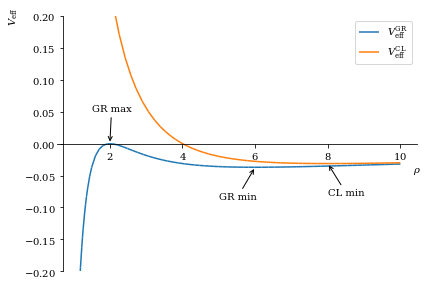

In [29]:
from sympy import plot
from numpy import array 
vlamb = 2
rhomax = 10
grcp = [(float(r.subs(nlamb,vlamb)),
         float(Vlamb.subs({nrho:r}).subs({nlamb:vlamb})))
         for r in r0]
clcp = (float(r0cl.subs(nlamb,vlamb)),
        float(Vcl.subs(nrho,r0cl).subs(nlamb,vlamb)))
p1 = plot(Vlamb.subs(nlamb,vlamb),(nrho,1,rhomax),line_color='C0',
          label=fr'${nV}^{{\mathrm{{GR}}}}$',show=False)
p1.annotations = [{'text': l, 'xy': cp, 'xytext':array(cp)+array(o),
                   'arrowprops':{'arrowstyle':'->'}} for cp,l,o in
                  zip(grcp,('GR max','GR min'),((-.5,.05),(-1,-.05)))]
p2 = plot(Vcl.subs(nlamb,2),(nrho,1,rhomax),line_color='C1',
          label=fr'${nV}^{{\mathrm{{CL}}}}$',show=False)
p1.annotations += [{'text':'CL min',
                    'xy':clcp, 'xytext': array(clcp)+(0,-.05),
                    'arrowprops':{'arrowstyle':'->'}}]
p1.extend(p2)
p1.xlabel      = r'$\rho$'
p1.ylabel      = f'${nV}$'
p1.ylim        = (-.2,.2)
p1.axis_center = (.7,0)
p1.legend      = True
p1.show()

Bemærk at $V_{\mathrm{eff}}^{\mathrm{GR}}$ falder voldsomt for $\rho$ mindre en maksimumet. 

Note that $V_{\mathrm{eff}}^{\mathrm{GR}}$ drops sharply for $\rho$ smaller than the maximum.

## Kraften 

Kraften fra massen $M$ på $m$ er differentialet af $V_{\mathrm{eff}}$, på nær ledet $\lambda^2/(2\rho^2)$, med hensyn til afstanden $\rho$.  Vi finder i generel relativitetsteori 

## Forces

The force from the mass $M$ on $m$ is the differential of $V_{\mathrm{eff}}$, except the term $\lambda^2/(2\rho^2)$, with respect to the distance $\rho$. We find in general theory of relativity

In [30]:
Flamb = (Vlamb-nlamb**2/2/nrho**2).diff(nrho)
Eq(Fn,Flamb)

Eq(F^r, 3*lambda**2/(2*rho**4) + 1/(2*rho**2))

In [31]:
Fcl = (Vcl-nlamb**2/2/nrho**2).diff(nrho)
Eq(Fn,Fcl)

Eq(F^r, 1/(2*rho**2))

Lad os tegne disse

Let's draw these

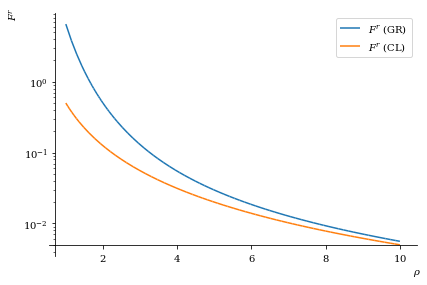

In [32]:
rhomin = 1
p1 = plot(Flamb.subs(nlamb,vlamb),(nrho,rhomin,rhomax),line_color='C0',
          label=fr'${Fn}\ (\mathrm{{GR}})$',show=False)
p2 = plot(Fcl.subs(nlamb,2),(nrho,rhomin,rhomax),line_color='C1',
          label=fr'${Fn}\ (\mathrm{{CL}})$',show=False)
p1.extend(p2)
p1.xlabel      = r'$\rho$'
p1.ylabel      = f'${Fn}$'
p1.axis_center = (.7,5e-3)
p1.legend      = True
p1.yscale      = 'log'
p1.show()

# Opsummering 

I denne note har vi set hvordan vi med hjælp fra _SymPy_ kan udregne forholdvis komplekse problemer forholdvist nemt.  Vi har udledt kraften på en masse $m$ fra en sfærisk symmetrisk masse $M$ fra generel relativitetsteori. 

Det er nu let at se at problemet er givet ved de fire koblet, ordinære differential ligninger 

# Summary

In this note, we have seen how, with the help of _SymPy_, we can calculate relatively complex problems relatively easily. We have derived the force of a mass of $m$ from a spherically symmetric mass of $M$ from general relativity.

It is now easy to see that the problem is given by the four coupled, ordinary differential equations

\begin{align*}
  \frac{\mathrm{d}\rho_x}{\mathrm{d}T} &= \upsilon_x\\
  \frac{\mathrm{d}\rho_y}{\mathrm{d}T} &= \upsilon_y\\
  \frac{\mathrm{d}\upsilon_x}{\mathrm{d}T} &= - \frac{\rho_x}{2\rho^3}\left(1+\frac{3\lambda^2}{\rho^2}\right)\\
  \frac{\mathrm{d}\upsilon_y}{\mathrm{d}T} &= - \frac{\rho_y}{2\rho^3}\left(1+\frac{3\lambda^2}{\rho^2}\right)
  \quad,
\end{align*}

som, givet start betingelserne for stedet $\vec{\rho}_0$ og hastigheden $\vec{\upsilon}_0$ kan løses numerisk. 

which, given the initial values of the position $\vec{\rho}_0$ and the velocity $\vec{\upsilon}_0$ can be solved numerically.